# Protein classication benchmark using topological features

We build and fit SVM, XGBoost, LightGBM, and MLP models trained on persistence curves for each of the 55 classification tasks in the Protein Classification Benchmark [PCB00019](http://pongor.itk.ppke.hu/benchmark/#/Browse). 

Compare to the Barnes et al. [Frontiers](https://www.frontiersin.org/articles/10.3389/frai.2021.681174/full) paper.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder, label_binarize, normalize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
os.chdir('/content/drive/MyDrive/protein-structure-learning/data')

## Load diagrams and cast matrix

In [ ]:
diagrams = np.load('./diagrams.npy')
cast = pd.read_table('./SCOP40mini_sequence_minidatabase_19.cast')
cast.columns.values[0] = 'protein'

## SVM





In [ ]:
task_acc_svm_train = np.empty((0, 1), float)
task_acc_svm_test = np.empty((0, 1), float)
for task in range(1, 56):
    task_col = cast.iloc[:,task]

    # Partition training and testing sets
    train_set = task_col.isin([1, 2])
    test_set = task_col.isin([3, 4])

    # Generate training and testing targets
    train_targets_all = np.ravel(label_binarize(task_col, classes=[1]))
    test_targets_all = np.ravel(label_binarize(task_col, classes=[3]))
    train_targets = train_targets_all[train_set]
    test_targets = test_targets_all[test_set]

    # Partition diagrams
    train_data = diagrams[train_set]
    test_data = diagrams[test_set]

    # SVM
    clf = SVC(kernel='rbf', C=20).fit(train_data, train_targets)
    task_acc_svm_train = np.append(task_acc_svm_train, clf.score(train_data, train_targets))
    task_acc_svm_test = np.append(task_acc_svm_test, clf.score(test_data, test_targets))

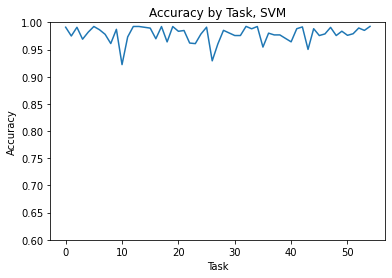

0.9021977970233963
0.9782259185803254


In [ ]:
plt.clf()
plt.plot(task_acc_svm_test)
plt.title('Accuracy by Task, SVM')
plt.ylabel('Accuracy')
plt.xlabel('Task')
plt.ylim([0.6, 1])
plt.show()

print(np.mean(task_acc_svm_train))
print(np.mean(task_acc_svm_test))

## XGBoost



In [ ]:
task_acc_xgb_train = np.empty((0, 1), float)
task_acc_xgb_test = np.empty((0, 1), float)
for task in range(1, 56):
    task_col = cast.iloc[:,task]

    # Partition training and testing sets
    train_set = task_col.isin([1, 2])
    test_set = task_col.isin([3, 4])

    # Generate training and testing targets
    train_targets_all = np.ravel(label_binarize(task_col, classes=[1]))
    test_targets_all = np.ravel(label_binarize(task_col, classes=[3]))
    train_targets = train_targets_all[train_set]
    test_targets = test_targets_all[test_set]

    # Partition diagrams
    train_data = diagrams[train_set]
    test_data = diagrams[test_set]

    # XGBoost
    clf = XGBClassifier().fit(train_data, train_targets)
    task_acc_xgb_train = np.append(task_acc_xgb_train, clf.score(train_data, train_targets))
    task_acc_xgb_test = np.append(task_acc_xgb_test, clf.score(test_data, test_targets))

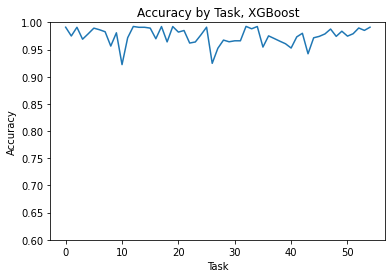

0.9705766327660473
0.9748357519214041


In [ ]:
plt.clf()
plt.plot(task_acc_xgb_test)
plt.title('Accuracy by Task, XGBoost')
plt.ylabel('Accuracy')
plt.xlabel('Task')
plt.ylim([0.6, 1])
plt.show()

print(np.mean(task_acc_xgb_train))
print(np.mean(task_acc_xgb_test))

## LightGBM

In [ ]:
task_acc_lgbm_train = np.empty((0, 1), float)
task_acc_lgbm_test = np.empty((0, 1), float)
for task in range(1, 56):
    task_col = cast.iloc[:,task]

    # Partition training and testing sets
    train_set = task_col.isin([1, 2])
    test_set = task_col.isin([3, 4])

    # Generate training and testing targets
    train_targets_all = np.ravel(label_binarize(task_col, classes=[1]))
    test_targets_all = np.ravel(label_binarize(task_col, classes=[3]))
    train_targets = train_targets_all[train_set]
    test_targets = test_targets_all[test_set]

    # Partition diagrams
    train_data = diagrams[train_set]
    test_data = diagrams[test_set]

    # LightGBM
    clf = LGBMClassifier().fit(train_data, train_targets)
    task_acc_lgbm_train = np.append(task_acc_lgbm_train, clf.score(train_data, train_targets))
    task_acc_lgbm_test = np.append(task_acc_lgbm_test, clf.score(test_data, test_targets))

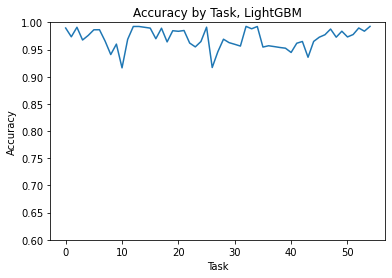

1.0
0.9704598619677445


In [ ]:
plt.clf()
plt.plot(task_acc_lgbm_test)
plt.title('Accuracy by Task, LightGBM')
plt.ylabel('Accuracy')
plt.xlabel('Task')
plt.ylim([0.6, 1])
plt.show()

print(np.mean(task_acc_lgbm_train))
print(np.mean(task_acc_lgbm_test))

## MLP
Caution: this is very time-intensive.

In [ ]:
task_acc_mlp = np.empty((0, 1), float)
for task in range(1, 56):
    task_col = cast.iloc[:,task]

    # Partition training and testing sets
    train_set = task_col.isin([1, 2])
    test_set = task_col.isin([3, 4])

    # Generate training and testing targets
    train_targets_all = np.ravel(label_binarize(task_col, classes=[1]))
    test_targets_all = np.ravel(label_binarize(task_col, classes=[3]))
    train_targets = train_targets_all[train_set]
    test_targets = test_targets_all[test_set]

    # Partition diagrams
    train_data = diagrams[train_set]
    test_data = diagrams[test_set]

    # Build binary sequential model for superfamily
    k_initializer = tf.keras.initializers.he_uniform()
    b_initializer = tf.keras.initializers.Ones()

    dropout_rate = 0.10

    model = Sequential([
        Dense(200, activation = 'relu', 
                input_shape = train_data[0].shape, 
                kernel_initializer=k_initializer,
                bias_initializer=b_initializer),
        Dropout(dropout_rate),
        Dense(200, activation = 'relu'),
        Dense(200, activation = 'relu'),
        Dropout(dropout_rate),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1, activation='sigmoid')
        ])

    # Compile model
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

    # Fit model
    history = model.fit(train_data, train_targets, 
                        epochs=200, validation_split=0.15, batch_size=50, 
                        verbose=1)
    test_loss, test_acc = model.evaluate(x=test_data, y=test_targets, verbose=0)
    task_acc_mlp = np.append(task_acc_mlp, test_acc)

Streaming output truncated to the last 5000 lines.
13/13 [==============================] - 0s 12ms/step - loss: 0.6096 - acc: 0.7260 - val_loss: 0.4881 - val_acc: 0.9123
Epoch 102/200
13/13 [==============================] - 0s 13ms/step - loss: 0.5589 - acc: 0.7539 - val_loss: 0.4123 - val_acc: 0.9123
Epoch 103/200
13/13 [==============================] - 0s 12ms/step - loss: 0.5686 - acc: 0.7477 - val_loss: 0.4007 - val_acc: 0.9123
Epoch 104/200
13/13 [==============================] - 0s 12ms/step - loss: 0.5883 - acc: 0.7492 - val_loss: 0.3825 - val_acc: 0.9123
Epoch 105/200
13/13 [==============================] - 0s 12ms/step - loss: 0.5664 - acc: 0.7492 - val_loss: 0.4994 - val_acc: 0.9123
Epoch 106/200
13/13 [==============================] - 0s 12ms/step - loss: 0.5641 - acc: 0.7523 - val_loss: 0.4215 - val_acc: 0.9123
Epoch 107/200
13/13 [==============================] - 0s 13ms/step - loss: 0.5720 - acc: 0.7461 - val_loss: 0.5412 - val_acc: 0.8860
Epoch 108/200
13/13 [====

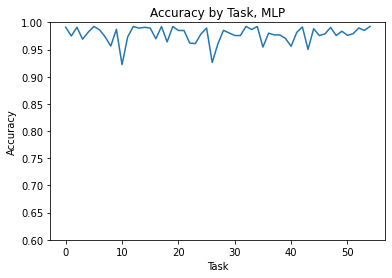

In [ ]:
plt.clf()
plt.plot(task_acc_mlp)
plt.title('Accuracy by Task, MLP')
plt.ylabel('Accuracy')
plt.xlabel('Task')
plt.ylim([0.6, 1])
plt.show()

## Summary

Overall, we find that the SVM performs best across the models tested, with the MLP a close second (though much, much more time-intensive).

We also find that persistence curves are about equivalent to the most accurate method mentioned in the Frontiers paper (persistence images), and much more flexible.

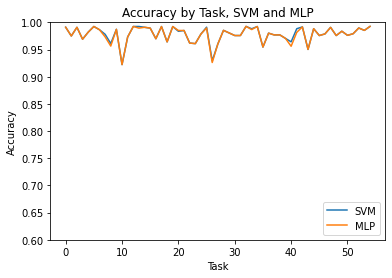

In [ ]:
plt.clf()
plt.plot(task_acc_svm_test)
plt.plot(task_acc_mlp)
plt.title('Accuracy by Task, SVM and MLP')
plt.ylabel('Accuracy')
plt.xlabel('Task')
plt.ylim([0.6, 1])
plt.legend(['SVM', 'MLP'], loc='lower right')
plt.show()

In [ ]:
print(np.mean(task_acc_svm_test))
print(np.mean(task_acc_mlp))
print(np.mean(task_acc_xgb_test))
print(np.mean(task_acc_lgbm_test))

0.9782259185803254
0.9776482809673656
0.9748357519214041
0.9704598619677445
